# Neural Network Model

In [1]:
# Import packages
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dropout, Dense, Activation, Flatten
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, make_scorer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
import math
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

Using TensorFlow backend.


In [2]:
# Import dataset
df = pd.read_csv('data/features_df.csv')

In [3]:
# Split the data into training and test sets (30% held out for testing)
y = df.loc[:, ['viewCount']] # dependent variable
X = df.loc[:, ['titleLen', 'subscriberCount', 'avgViewCount', 'humanCount', 'HOW TO & STYLE', 'SPORTS', 'TRAVEL', 'Negative', 'titleINTJ']] # selected independant variables

# Feature Scaling
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X),columns=['titleLen', 'subscriberCount', 'avgViewCount', 'humanCount', 'HOW TO & STYLE', 'SPORTS', 'TRAVEL', 'Negative', 'titleINTJ'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

## Performing Grid Search

In [4]:
def create_model(neurons=32, dropout_rate=0):
    # Setting default values
    activation='relu'
    init_mode='uniform'
    optimizer='adam'
    
    # Create model
    model = Sequential()
    model.add(Dense(128, input_dim=X_train.shape[1], kernel_initializer=init_mode, activation=activation))
    model.add(Dense(neurons, kernel_initializer=init_mode, activation=activation))
    model.add(Dense(neurons, kernel_initializer=init_mode, activation=activation))
    model.add(Dense(neurons, kernel_initializer=init_mode, activation=activation))
    model.add(Dense(1, kernel_initializer=init_mode, activation='linear'))
    
    # Compile model
    model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])
    
    return model

In [5]:
# Create model
model = KerasClassifier(build_fn=create_model, batch_size=1000, epochs=1, verbose=0) #set verbose=1 to see training progress

In [6]:
# Setting parameters for Grid Search
parameters = {'epochs':[100],
              'batch_size':[1000, 2500],
              'neurons':[32, 64, 128]
             }

In [7]:
# Run Grid Search
mse = make_scorer(mean_squared_error, greater_is_better=False)
grid = GridSearchCV(estimator=model, param_grid=parameters, n_jobs=-1, scoring=mse)
grid_result = grid.fit(X_train, y_train)

In [8]:
# Print Best Results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: -489874718973712.375000 using {'batch_size': 1000, 'epochs': 100, 'neurons': 32}


In [9]:
# Print All Results
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

## Building the Model

In [4]:
nnModel = Sequential()

# The Input Layer :
nnModel.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
nnModel.add(Dense(32, kernel_initializer='normal',activation='relu'))
nnModel.add(Dense(32, kernel_initializer='normal',activation='relu'))
nnModel.add(Dense(32, kernel_initializer='normal',activation='relu'))

# The Output Layer :
nnModel.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
nnModel.compile(loss='mse', optimizer='adam', metrics =['mae', 'mse'])
nnModel.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               1280      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 7,553
Trainable params: 7,553
Non-trainable params: 0
_________________________________________________________________


In [5]:
checkpoint_name = 'neural_networks_weights.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 0, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [6]:
history = nnModel.fit(X_train, y_train, epochs=100, batch_size=1000, validation_data = (X_test,y_test), callbacks=callbacks_list, verbose=0)

## Checking Epoch Progress

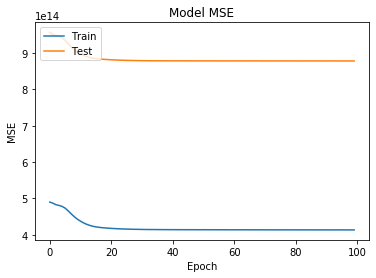

In [10]:
import matplotlib.pyplot as plt
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('Model MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

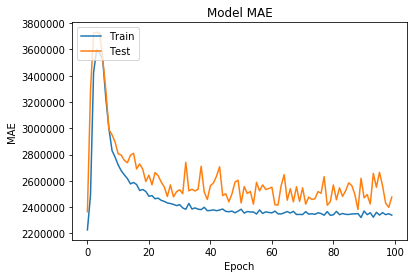

In [11]:
import matplotlib.pyplot as plt
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

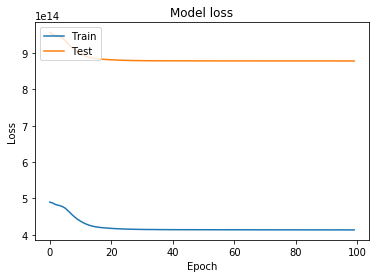

In [12]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

## Getting Best Metrics

In [13]:
# Load weights file of the best model :
weights_file = 'neural_networks_weights.hdf5' # load the best checkpoint 
nnModel.load_weights(weights_file) # load it
nnModel.compile(loss='mse', optimizer='adam', metrics=['mse'])

In [14]:
print('Neural Networks validation MAE = ', nnModel.history.history['mae'][-1])

Neural Networks validation MAE =  2338275.8


In [15]:
print('Neural Networks validation MSE = ', nnModel.history.history['mse'][-1])

Neural Networks validation MSE =  413333730000000.0


In [16]:
print('Neural Networks validation RMSE = ', math.sqrt(nnModel.history.history['mse'][-1]))

Neural Networks validation RMSE =  20330610.602678906
